In [1]:
# librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Definir la ruta a la carpeta Data
results_path = '../Data'

# Cargar los datos
file_path = os.path.join(results_path, 'Centro_comercial.csv')
df = pd.read_csv(file_path)

In [3]:
df.rename(columns={
    'CustomerID': 'ID_Cliente',
    'Genre': 'Genero',
    'Age': 'Edad',
    'Annual Income (k$)': 'Ingreso_Anual',
    'Spending Score (1-100)': 'Puntaje_Gasto'
}, inplace=True)

df['Genero'] = df['Genero'].map({'Male': 'Masculino', 'Female': 'Femenino'})

In [4]:
# Mostrar las primeras filas del DataFrame
print("\nPrimeras filas del DataFrame:")
df.head()


Primeras filas del DataFrame:


,ID_Cliente,Genero,Edad,Ingreso_Anual,Puntaje_Gasto
0,1,Masculino,19,15,39
1,2,Masculino,21,15,81
2,3,Femenino,20,16,6
3,4,Femenino,23,16,77
4,5,Femenino,31,17,40


In [5]:
# Descripción general del DataFrame
print("Descripción general de los datos:")
print(df.info())

Descripción general de los datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID_Cliente     200 non-null    int64 
 1   Genero         200 non-null    object
 2   Edad           200 non-null    int64 
 3   Ingreso_Anual  200 non-null    int64 
 4   Puntaje_Gasto  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [6]:
# formato de las columnas
df['ID_Cliente'] = df['ID_Cliente'].astype(str)
df['Genero'] = df['Genero'].astype(str)

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())
print(" ")
# Tabla de frecuencia para la variable 'Gender'
tabla_frecuencia = df['Genero'].value_counts()
print("Tabla de frecuencia de la variable 'Genero':")
print(tabla_frecuencia)


Estadísticas descriptivas:
             Edad  Ingreso_Anual  Puntaje_Gasto
count  200.000000     200.000000     200.000000
mean    38.850000      60.560000      50.200000
std     13.969007      26.264721      25.823522
min     18.000000      15.000000       1.000000
25%     28.750000      41.500000      34.750000
50%     36.000000      61.500000      50.000000
75%     49.000000      78.000000      73.000000
max     70.000000     137.000000      99.000000
 
Tabla de frecuencia de la variable 'Genero':
Femenino     112
Masculino     88
Name: Genero, dtype: int64


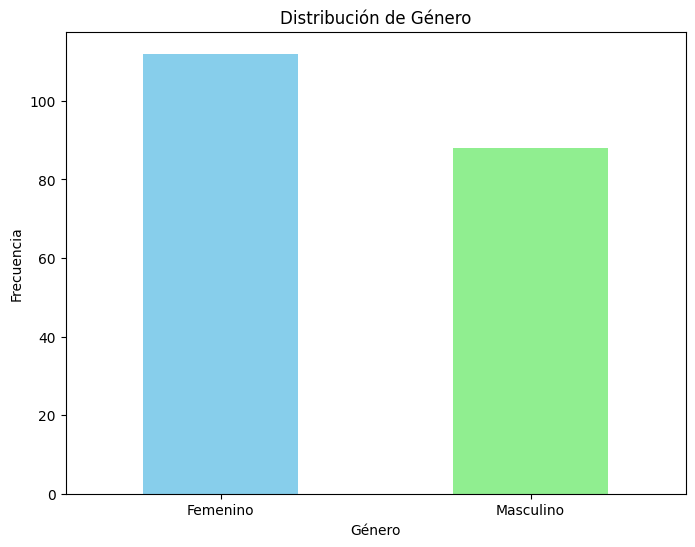

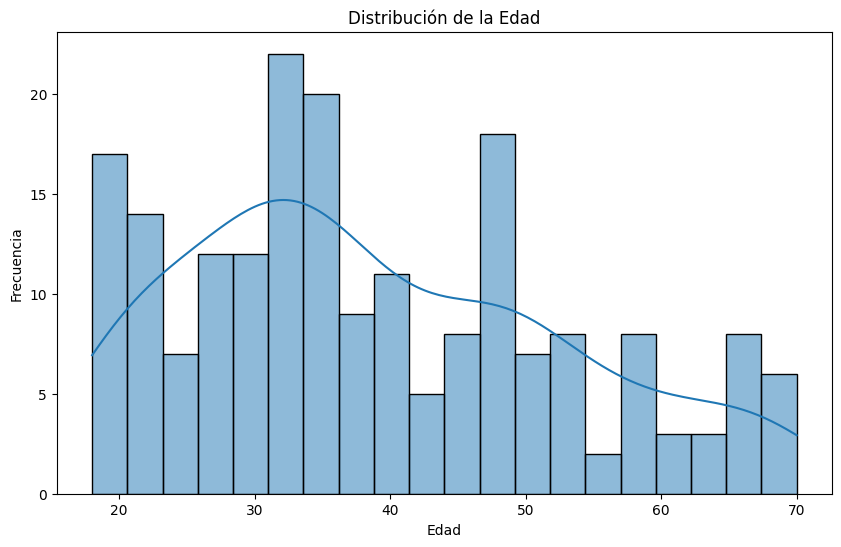

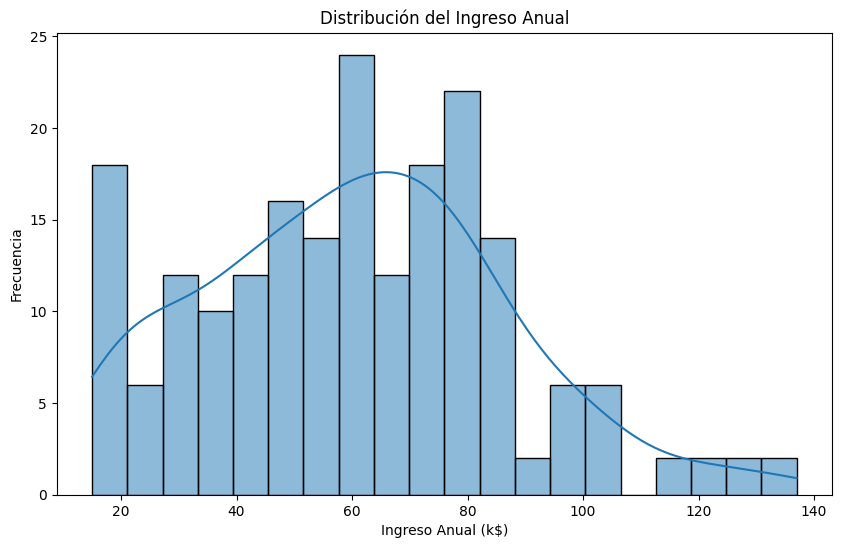

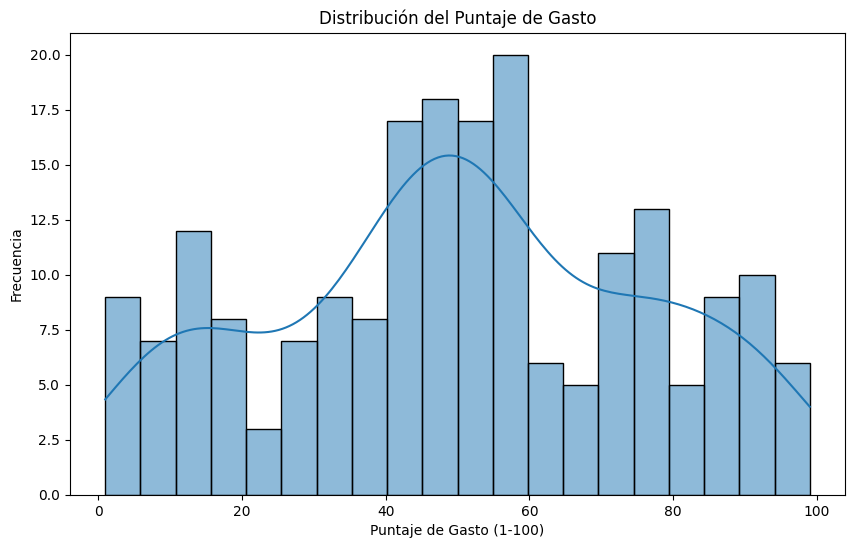

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_21452\393337251.py:47: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)


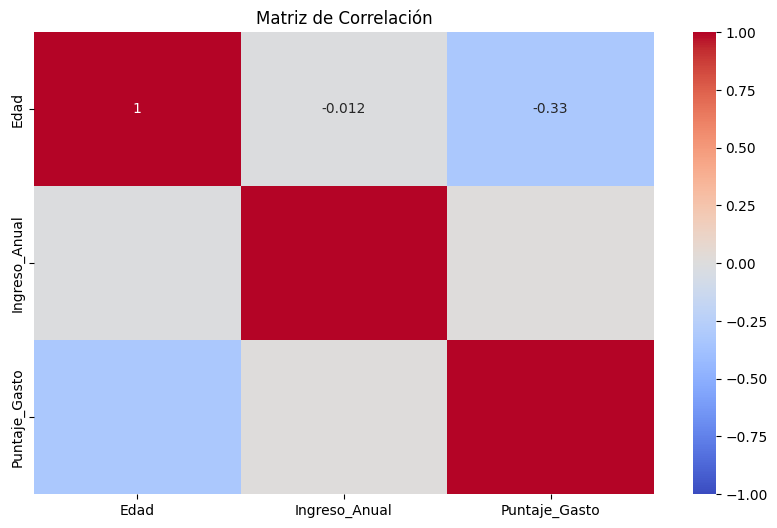

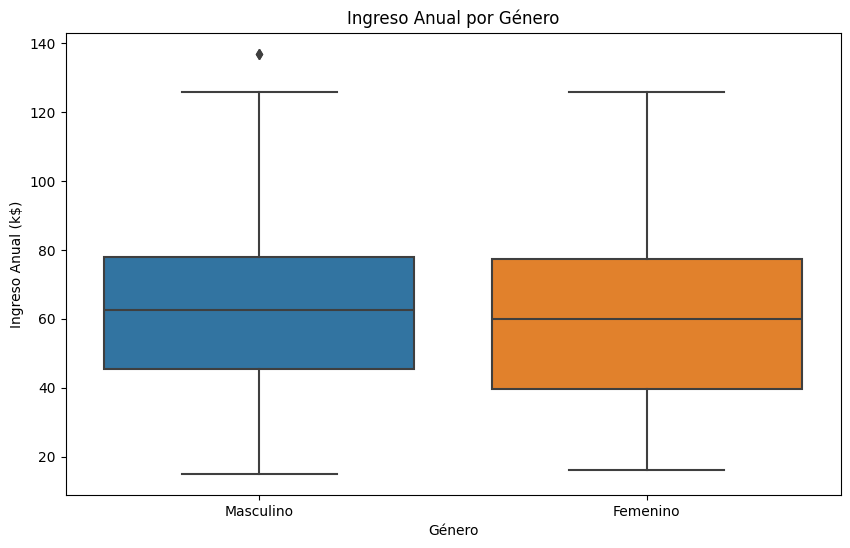

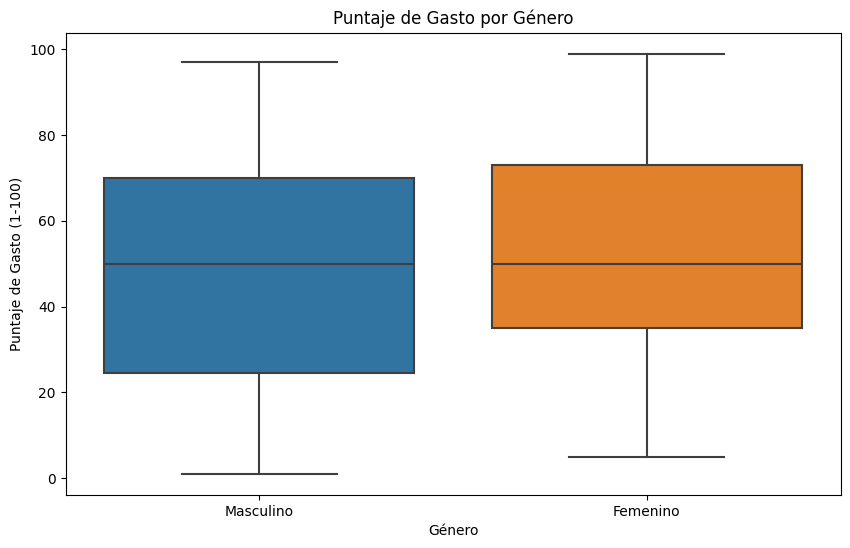

In [9]:
# Definir la ruta a la carpeta Results
results_path = '../Results'

# Asegúrate de que la carpeta Results existe
if not os.path.exists(results_path):
    os.makedirs(results_path)

# Gráfico de barras para la variable 'Gender'
plt.figure(figsize=(8, 6))
tabla_frecuencia.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.savefig(os.path.join(results_path, 'Distribucion_Genero.png'))  # Guardar el gráfico
plt.show()

# Distribución de la variable 'Edad'
plt.figure(figsize=(10, 6))
sns.histplot(df['Edad'], bins=20, kde=True)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.savefig(os.path.join(results_path, 'Distribucion_Edad.png'))  # Guardar el gráfico
plt.show()

# Distribución de la variable 'Ingreso Anual'
plt.figure(figsize=(10, 6))
sns.histplot(df['Ingreso_Anual'], bins=20, kde=True)
plt.title('Distribución del Ingreso Anual')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Frecuencia')
plt.savefig(os.path.join(results_path, 'Distribucion_Ingreso_Anual.png'))  # Guardar el gráfico
plt.show()

# Distribución de la variable 'Spending Score'
plt.figure(figsize=(10, 6))
sns.histplot(df['Puntaje_Gasto'], bins=20, kde=True)
plt.title('Distribución del Puntaje de Gasto')
plt.xlabel('Puntaje de Gasto (1-100)')
plt.ylabel('Frecuencia')
plt.savefig(os.path.join(results_path, 'Distribucion_Puntaje_Gasto.png'))  # Guardar el gráfico
plt.show()

# Análisis de correlación entre las variables numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.savefig(os.path.join(results_path, 'Matriz_Correlacion.png'))  # Guardar el gráfico
plt.show()

# Boxplot para comparar la distribución del Ingreso Anual por Género
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genero', y='Ingreso_Anual', data=df)
plt.title('Ingreso Anual por Género')
plt.xlabel('Género')
plt.ylabel('Ingreso Anual (k$)')
plt.savefig(os.path.join(results_path, 'Ingreso_Anualpor_Genero.png'))  # Guardar el gráfico
plt.show()

# Boxplot para comparar la distribución del Puntaje de Gasto por Género
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genero', y='Puntaje_Gasto', data=df)
plt.title('Puntaje de Gasto por Género')
plt.xlabel('Género')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.savefig(os.path.join(results_path, 'Puntaje_Gasto_por_Genero.png'))  # Guardar el gráfico
plt.show()


### Transformacion de variables


Ingresos y puntajes de gastos por grupo Edad:
            Ingreso_Anual            Puntaje_Gasto           
                    mean        std          mean        std
Grupo_Edad                                                  
18-24          43.806452  21.257813     55.774194  25.219978
25-34          71.148148  27.894956     63.166667  24.283506
35-44          66.809524  27.800893     49.428571  30.700078
45-54          58.641026  24.315348     36.230769  16.261776
55-64          56.000000  21.975744     32.312500  21.752299
65+            51.285714  12.602982     46.714286  11.431593

Ingresos y puntajes de gastos por grupo Edad y género:
                      Ingreso_Anual            Puntaje_Gasto           
                              mean        std          mean        std
Grupo_Edad Genero                                                     
18-24      Femenino      41.222222  19.585576     60.611111  22.186745
           Masculino     47.384615  23.715461     49.076923  2

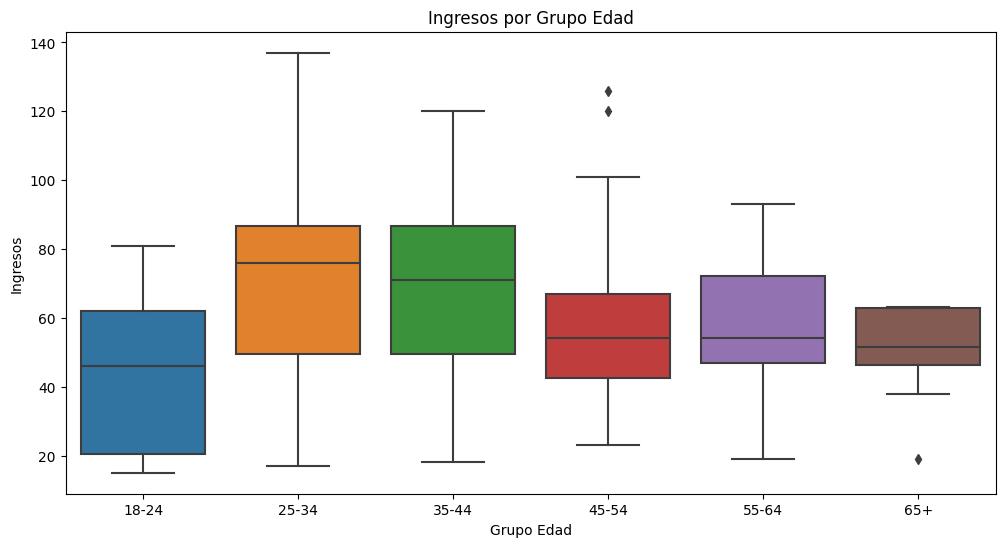

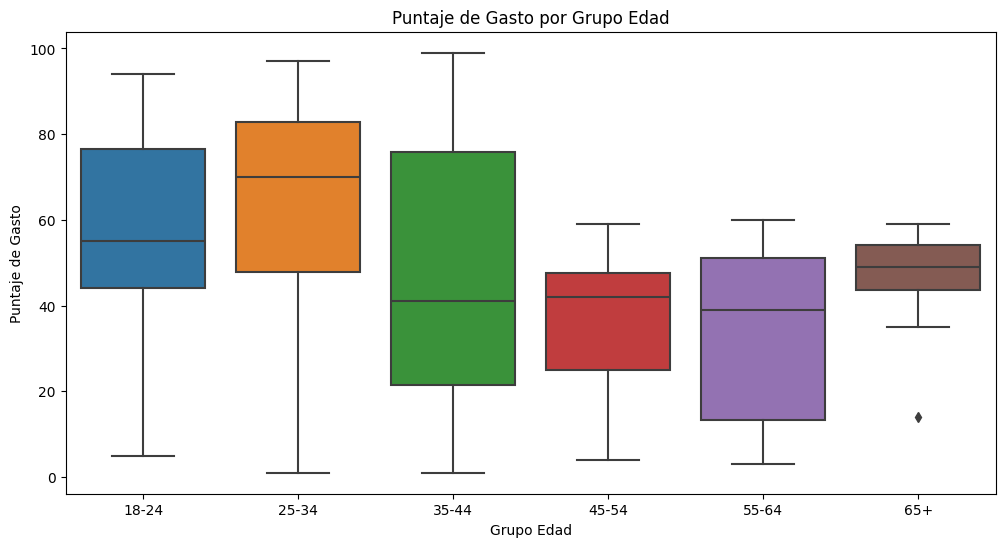

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_21452\1421805209.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Grupo_Edad', y='Ingreso_Anual', hue='Genero', data=df, ci=None)


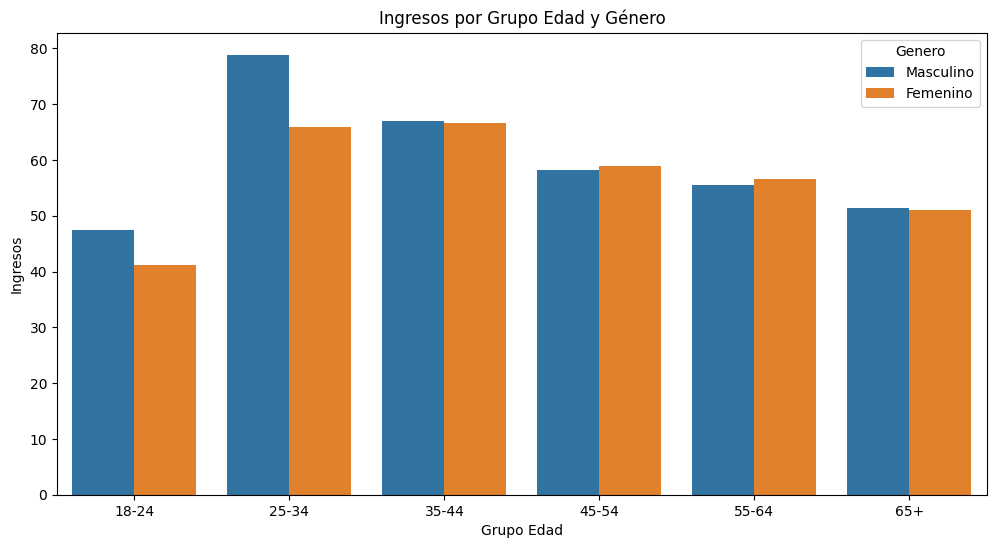

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_21452\1421805209.py:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Grupo_Edad', y='Puntaje_Gasto', hue='Genero', data=df, ci=None)


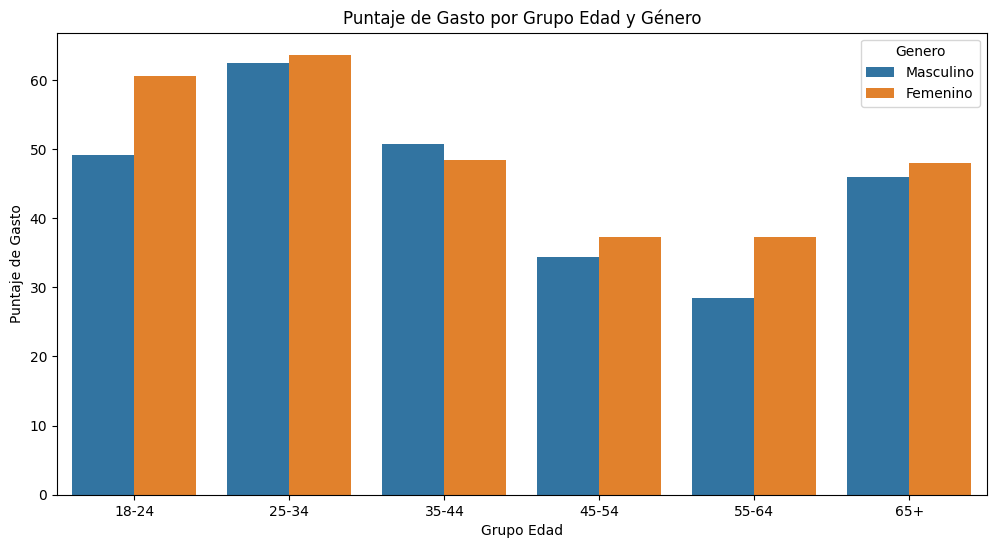

In [10]:
# Crear grupos Edads
bins = [18, 24, 34, 44, 54, 64, 120]  # Los límites de los grupos Edads
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['Grupo_Edad'] = pd.cut(df['Edad'], bins=bins, labels=labels, right=True)

#Comparar ingresos y puntajes de gastos por grupos Edads
age_group_stats = df.groupby('Grupo_Edad').agg({'Ingreso_Anual': ['mean', 'std'], 'Puntaje_Gasto': ['mean', 'std']})
print("\nIngresos y puntajes de gastos por grupo Edad:\n", age_group_stats)

#Comparar ingresos y puntajes de gastos por grupos Edads y género
age_gender_stats = df.groupby(['Grupo_Edad', 'Genero']).agg({'Ingreso_Anual': ['mean', 'std'], 'Puntaje_Gasto': ['mean', 'std']})
print("\nIngresos y puntajes de gastos por grupo Edad y género:\n", age_gender_stats)

# Boxplot de Ingresos por Grupo Edad
plt.figure(figsize=(12, 6))
sns.boxplot(x='Grupo_Edad', y='Ingreso_Anual', data=df)
plt.title('Ingresos por Grupo Edad')
plt.xlabel('Grupo Edad')
plt.ylabel('Ingresos')
plt.show()

# Boxplot de Puntaje de Gasto por Grupo Edad
plt.figure(figsize=(12, 6))
sns.boxplot(x='Grupo_Edad', y='Puntaje_Gasto', data=df)
plt.title('Puntaje de Gasto por Grupo Edad')
plt.xlabel('Grupo Edad')
plt.ylabel('Puntaje de Gasto')
plt.show()

# Gráfico de Barras de Ingresos por Grupo Edad y Género
plt.figure(figsize=(12, 6))
sns.barplot(x='Grupo_Edad', y='Ingreso_Anual', hue='Genero', data=df, ci=None)
plt.title('Ingresos por Grupo Edad y Género')
plt.xlabel('Grupo Edad')
plt.ylabel('Ingresos')
plt.show()


# Gráfico de Barras de Puntaje de Gasto por Grupo Edad y Género
plt.figure(figsize=(12, 6))
sns.barplot(x='Grupo_Edad', y='Puntaje_Gasto', hue='Genero', data=df, ci=None)
plt.title('Puntaje de Gasto por Grupo Edad y Género')
plt.xlabel('Grupo Edad')
plt.ylabel('Puntaje de Gasto')
plt.show()



